<a href="https://colab.research.google.com/github/ErnestoMedina99/FisicaComputacional2/blob/master/LogicaAND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Se importan las librerías
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Definiendo parámetros

#Cantidad de nodos: x_1, x_2, ..., x_n
Input_Nodes = 2
#Número de veces que se va a iterar el proceso de aprendizaje
Num_Iteraciones = 2000
#etha: el ancho de paso
learning_rate = 0.01

#w_i+1 = w_i + etha*error*x_i
#B_i+1 = B_i + etha*error*B_i

In [0]:
#Estableciendo los datos:

#x_1   x_2  y_i
# 0     0    0
# 1     0    0
# 1     1    1
# 0     0    0

#Arreglo de los x_i
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32)  # 4x2
#Arreglo de las y_i
y = np.array([0, 0, 1, 0], np.float32)                      # AND operation
#Cambiando la matriz de y_i para que se puedan multiplicar las matrices
y = np.reshape(y, [4,1])

In [0]:
#Declarando placeholder para las x
X = tf.placeholder(tf.float32, shape=[4, 2])
#Declarando placeholder para las y
Y = tf.placeholder(tf.float32, shape=[4, 1])

#Llenando matriz de pesos
W = tf.Variable(tf.zeros([Input_Nodes, 1]), tf.float32)
#Llenando matriz de bias
B = tf.Variable(tf.zeros([1, 1]), tf.float32)

#Consiguiendo matriz de y gorrito (que se va aproximando a y)
yHat = tf.sigmoid( tf.add(tf.matmul(X, W), B) )        # 4x1
#Se calcula el error
err = Y - yHat
#Se calcula la deltaW como el error por X
deltaW = tf.matmul(tf.transpose(X), err )    # have to be 2x1
#Se calcula la deltaB como el error por B
deltaB = tf.reduce_sum(err, 0)      # 4, have to 1x1. sum all the biases? yes
#Se calculan los siguientes pesos y bias
W_ = W + learning_rate * deltaW
B_ = B + learning_rate * deltaB

In [0]:
#Calculando la pérdida como la desviación estándar al cuadrado
loss = tf.reduce_mean(tf.squared_difference(Y, yHat))

#guardando
tf.summary.scalar("loss",loss)
merged_op = tf.summary.merge_all()

#Dejándolo en el directorio
writer = tf.summary.FileWriter("/content/drive/My Drive/FisicaComputacional2/Tensorflow")

In [0]:
step = tf.group(W.assign(W_), B.assign(B_))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
writer.add_graph(sess.graph)

for k in range(Num_Iteraciones):
    _, summary = sess.run([step, merged_op], feed_dict={X: x, Y: y})
    writer.add_summary(summary,k)

W = np.squeeze(sess.run(W))
b = np.squeeze(sess.run(B))

In [11]:
#Comando para darle una estética distinta a las gráficas.
#sns.set(rc={'figure.figsize':(12,12)})
#figure(1, figsize=(12, 12))

NameError: ignored

W: [2.6895783 2.6895783]
b: -4.26431
plot_y: [1.7854939  0.38549384]


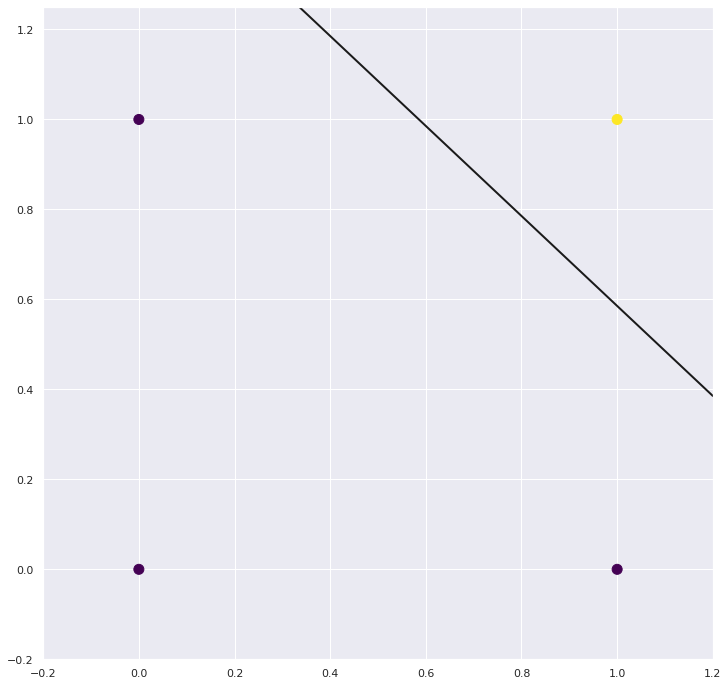

In [12]:
#Se grafica los datos diferenciados con la recta

plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)

print('W: ' + str(W))
print('b: ' + str(b))
print('plot_y: '+ str(plot_y))

plt.scatter(x[:, 0], x[:, 1], c = (0,0,1,0), s=100, cmap="viridis" )
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()